In [2]:
import pandas as pd

df = pd.read_csv('../z20_data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
df.info()

# item_price가 문자열 형태

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
df.shape
# 행,열 개수

(4622, 5)

In [5]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
df['order_id'] = df['order_id'].astype(str)  
# order_id 를 문자열 취급

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [8]:
# order_id 주문당 평균 계산금액 출력하시오.
# df['item_price'] = df['item_price'].str.replace('$','').astype(float)
# (df.groupby('order_id')['item_price'].sum())/(df.groupby('order_id')['quantity'].count())
df.groupby('order_id')['item_price'].sum().mean()
# -> 전체 평균


# 한 주문에 10달러 이상 사용한 주문 번호를 출력하시오.
df_sum = df.groupby('order_id').sum()  # quantity 주문량, item_name 주문한음식, item_price 주문금액 더해줌
df_sum[df_sum['item_price'] >= 10].sort_values('item_price',ascending=False).head()


TypeError: Could not convert string '$2.39 $3.39 $3.39 $2.39 $8.75 $4.45 $8.99 $1.09 $9.25 $11.25 $8.99 $1.09 $8.99 $1.69 $11.75 $1.25 $21.96 $8.75 $2.15 $1.25 $8.75 $11.25 $9.25 $11.25 $8.75 $8.75 $11.25 $2.15 $8.99 $1.09 $1.69 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $8.99 $3.99 $11.48 $8.49 $8.49 $4.78 $9.25 $1.25 $1.25 $1.25 $11.25 $11.25 $11.75 $4.45 $11.25 $4.45 $8.99 $1.09 $11.25 $2.15 $11.25 $9.25 $11.75 $11.25 $11.25 $9.25 $2.95 $11.25 $4.45 $8.75 $2.95 $2.95 $8.75 $2.95 $2.95 $11.25 $1.50 $10.98 $16.98 $18.50 $10.98 $3.99 $1.09 $9.25 $9.25 $8.75 $4.45 $17.50 $8.75 $4.45 $8.75 $1.25 $4.45 $11.75 $5.90 $9.25 $9.25 $11.75 $9.25 $8.75 $8.75 $17.50 $4.45 $9.39 $1.25 $2.95 $11.25 $8.75 $8.75 $11.25 $2.15 $8.90 $11.25 $11.89 $10.98 $11.25 $4.45 $11.25 $11.25 $8.49 $10.98 $9.25 $2.95 $8.49 $3.39 $9.25 $8.75 $2.95 $3.00 $9.39 $11.75 $2.95 $1.50 $11.25 $11.75 $8.75 $2.15 $1.50 $8.49 $3.39 $11.75 $1.25 $17.50 $11.25 $1.25 $17.50 $8.75 $2.95 $1.25 $11.25 $11.75 $13.35 $11.25 $11.75 $11.25 $11.25 $4.45 $11.25 $8.49 $3.39 $9.25 $2.95 $4.78 $2.39 $3.99 $8.99 $8.99 $11.25 $11.25 $8.75 $11.25 $2.95 $4.45 $9.25 $8.75 $4.45 $8.75 $9.25 $8.49 $8.49 $10.98 $10.98 $3.99 $11.75 $8.75 $11.75 $4.45 $1.50 $1.25 $8.49 $8.49 $8.75 $8.75 $8.75 $9.25 $8.75 $2.95 $1.25 $11.25 $1.50 $10.98 $11.25 $4.45 $9.25 $8.75 $8.75 $9.25 $8.75 $4.45 $1.50 $8.75 $8.75 $8.49 $1.69 $8.75 $2.15 $9.25 $2.15 $1.50 $11.25 $11.75 $2.15 $6.49 $9.25 $9.25 $11.25 $11.25 $11.75 $11.75 $8.99 $1.09 $1.09 $1.09 $8.99 $11.75 $11.25 $8.75 $2.15 $1.25 $11.75 $9.25 $11.25 $8.75 $5.90 $8.75 $4.45 $9.25 $9.25 $4.45 $11.25 $4.45 $11.25 $8.75 $2.15 $11.89 $11.25 $8.75 $2.95 $1.50 $10.98 $1.09 $8.75 $4.30 $8.75 $11.25 $11.75 $11.75 $2.15 $11.25 $8.99 $1.09 $8.49 $8.49 $8.49 $3.39 $8.99 $10.98 $3.99 $11.75 $2.15 $8.75 $4.45 $2.50 $11.48 $1.09 $8.49 $8.49 $8.99 $3.39 $8.75 $8.75 $9.25 $9.25 $16.98 $3.99 $10.98 $1.09 $8.75 $2.95 $8.75 $8.75 $2.95 $9.25 $11.25 $2.15 $9.25 $4.45 $4.45 $9.25 $11.75 $11.75 $2.15 $9.25 $8.75 $11.25 $6.49 $8.75 $8.75 $8.75 $11.25 $2.95 $10.98 $3.99 $1.50 $9.25 $2.15 $8.75 $11.25 $11.89 $4.45 $1.50 $1.25 $8.75 $8.75 $4.45 $11.25 $11.75 $8.49 $1.09 $1.09 $1.69 $8.99 $3.39 $8.99 $1.69 $8.99 $8.99 $8.49 $8.99 $3.27 $8.99 $8.99 $1.09 $10.98 $1.69 $3.99 $8.49 $1.09 $8.75 $8.75 $11.75 $8.75 $9.25 $8.75 $3.39 $8.99 $8.99 $2.39 $9.25 $8.75 $8.99 $1.09 $9.25 $9.25 $8.99 $3.99 $2.39 $8.49 $1.09 $8.49 $8.99 $3.39 $11.25 $1.25 $8.99 $3.99 $8.75 $8.90 $6.49 $8.75 $9.25 $11.25 $11.25 $11.25 $1.25 $11.75 $1.25 $8.75 $9.25 $4.45 $1.25 $8.75 $1.25 $2.15 $17.98 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $1.50 $8.75 $8.75 $11.08 $8.99 $1.69 $8.99 $1.69 $10.98 $3.99 $3.39 $8.99 $2.39 $11.75 $2.15 $11.75 $2.95 $8.75 $8.75 $11.75 $11.25 $11.75 $11.25 $4.45 $11.25 $1.25 $2.18 $2.18 $2.39 $8.49 $8.99 $2.39 $11.25 $8.75 $11.75 $11.75 $11.25 $4.45 $2.15 $9.25 $2.95 $8.19 $10.58 $4.45 $9.25 $1.09 $8.99 $11.25 $1.50 $8.99 $3.99 $4.45 $11.75 $2.15 $11.25 $8.75 $4.45 $8.75 $9.25 $6.45 $8.75 $11.25 $11.25 $8.75 $11.75 $8.99 $3.99 $21.96 $8.99 $5.07 $8.49 $9.25 $11.25 $4.45 $3.39 $8.49 $8.99 $8.49 $17.50 $22.96 $8.75 $11.25 $11.89 $11.25 $8.49 $1.69 $1.09 $8.99 $8.99 $9.25 $8.75 $8.49 $2.39 $9.25 $2.95 $8.49 $3.99 $8.99 $8.49 $7.17 $8.49 $8.99 $17.50 $9.25 $9.25 $11.25 $1.25 $8.99 $1.09 $8.75 $4.45 $11.25 $2.15 $11.75 $11.25 $11.25 $8.75 $8.49 $8.49 $8.75 $4.45 $1.25 $11.75 $11.75 $2.50 $8.49 $8.99 $2.18 $11.25 $4.45 $11.25 $11.75 $8.49 $8.99 $1.69 $1.09 $8.99 $8.99 $11.25 $6.49 $11.25 $8.75 $4.45 $8.99 $1.69 $11.48 $10.98 $3.39 $8.49 $1.69 $11.75 $2.50 $8.49 $1.09 $1.09 $1.69 $8.49 $2.39 $11.75 $1.25 $8.49 $1.69 $8.49 $1.69 $11.75 $4.45 $8.75 $8.75 $4.45 $8.75 $11.25 $11.25 $8.75 $8.49 $3.99 $7.98 $8.49 $1.09 $8.49 $3.99 $8.49 $3.99 $8.99 $3.99 $11.25 $4.45 $8.49 $2.39 $8.49 $2.39 $3.99 $8.49 $1.25 $11.25 $4.45 $9.25 $4.45 $8.99 $1.69 $1.09 $1.09 $8.99 $3.99 $11.25 $8.90 $9.25 $11.25 $8.75 $11.25 $11.25 $11.25 $11.25 $11.25 $8.99 $8.49 $8.75 $8.75 $4.45 $16.98 $11.75 $11.25 $9.25 $4.45 $9.25 $2.95 $23.78 $8.49 $1.69 $3.75 $4.45 $9.25 $1.50 $11.25 $11.48 $11.25 $2.15 $8.75 $9.39 $8.49 $3.99 $8.19 $2.29 $11.48 $1.69 $11.48 $3.99 $17.50 $2.15 $8.75 $8.49 $1.69 $9.25 $2.95 $8.49 $1.69 $11.25 $4.45 $9.39 $9.25 $8.75 $8.75 $4.45 $11.89 $4.45 $4.45 $8.75 $8.75 $8.75 $2.15 $8.75 $3.75 $9.25 $11.25 $4.45 $6.49 $16.98 $9.25 $9.25 $8.75 $4.45 $18.50 $2.50 $2.95 $3.99 $8.49 $8.19 $11.08 $6.49 $11.75 $2.39 $8.99 $1.09 $11.25 $4.45 $11.25 $8.99 $1.69 $21.96 $2.18 $8.99 $8.99 $2.39 $8.75 $11.25 $8.69 $1.69 $8.90 $2.50 $8.75 $8.99 $1.09 $8.49 $8.49 $8.75 $4.45 $17.50 $8.75 $9.25 $8.49 $2.39 $8.75 $4.45 $11.25 $11.25 $11.25 $1.25 $11.75 $8.75 $8.49 $8.49 $8.49 $8.99 $8.75 $4.45 $11.48 $8.75 $1.25 $2.15 $9.25 $4.45 $11.75 $2.15 $11.25 $8.99 $2.39 $8.69 $8.69 $11.75 $2.95 $9.25 $4.45 $11.25 $11.75 $1.50 $9.25 $4.45 $1.50 $11.48 $8.99 $2.39 $11.25 $11.89 $2.15 $1.25 $11.75 $4.45 $8.75 $8.75 $11.25 $4.45 $11.25 $2.15 $4.45 $8.49 $1.09 $3.99 $11.25 $11.25 $11.75 $11.75 $6.49 $8.49 $2.39 $8.99 $2.39 $11.25 $2.15 $8.75 $2.95 $1.25 $8.75 $11.25 $17.50 $11.75 $11.75 $11.25 $11.25 $4.45 $2.50 $8.75 $8.99 $8.99 $1.69 $2.39 $8.49 $8.99 $2.39 $8.99 $1.69 $11.25 $1.25 $11.08 $8.69 $8.99 $1.09 $11.25 $11.25 $2.95 $1.25 $8.75 $1.25 $8.75 $8.75 $2.15 $1.25 $8.49 $3.99 $8.49 $2.39 $8.49 $7.17 $8.49 $2.39 $8.75 $4.45 $11.48 $8.75 $8.75 $11.48 $8.75 $9.25 $8.49 $3.99 $1.50 $11.25 $11.25 $8.75 $8.75 $4.45 $9.25 $4.45 $11.25 $8.75 $2.15 $8.75 $8.75 $4.30 $2.95 $8.75 $4.50 $9.25 $11.25 $4.45 $11.25 $11.25 $8.75 $9.25 $8.75 $2.15 $1.25 $8.75 $2.15 $1.25 $8.99 $8.49 $8.75 $8.75 $1.25 $11.75 $4.50 $8.75 $8.75 $8.99 $1.69 $3.99 $3.39 $8.49 $2.39 $8.99 $1.50 $11.25 $11.25 $8.75 $8.75 $2.15 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $26.07 $11.75 $1.50 $8.99 $8.99 $11.48 $8.75 $11.25 $2.15 $9.25 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $8.75 $2.15 $1.25 $11.89 $8.75 $11.75 $4.45 $18.50 $9.25 $9.39 $8.49 $2.39 $8.49 $1.69 $1.09 $8.99 $8.49 $2.18 $4.45 $8.75 $11.25 $1.25 $8.49 $3.39 $8.49 $3.99 $11.25 $8.75 $8.49 $1.69 $16.98 $9.25 $9.25 $11.75 $1.25 $11.25 $8.75 $8.49 $8.49 $8.75 $1.25 $1.25 $1.25 $8.49 $8.99 $11.25 $12.98 $11.75 $11.75 $4.45 $11.25 $11.75 $10.98 $8.49 $8.49 $2.39 $9.25 $11.25 $8.75 $2.95 $1.50 $11.25 $2.95 $9.25 $2.95 $9.25 $8.75 $11.25 $8.75 $8.75 $4.45 $17.50 $11.25 $1.25 $8.75 $2.95 $2.50 $9.25 $9.25 $9.25 $6.49 $17.50 $8.49 $1.69 $8.49 $3.99 $8.75 $2.95 $2.95 $8.49 $8.99 $8.99 $1.09 $8.49 $1.09 $1.09 $8.75 $4.45 $1.25 $11.25 $11.75 $11.25 $9.25 $11.25 $1.50 $11.25 $2.15 $10.98 $8.75 $11.75 $2.95 $11.25 $11.25 $9.25 $8.75 $9.25 $8.75 $8.75 $1.25 $2.15 $8.75 $8.75 $1.25 $11.25 $1.50 $2.15 $8.75 $8.75 $11.25 $8.75 $8.75 $11.25 $4.45 $8.49 $8.49 $8.49 $8.49 $8.99 $1.69 $2.39 $1.09 $1.09 $11.25 $2.95 $35.25 $8.75 $2.95 $1.25 $8.99 $1.09 $11.08 $11.25 $2.15 $9.25 $4.45 $8.75 $8.75 $8.75 $4.45 $1.25 $11.89 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $1.69 $8.69 $8.69 $9.25 $2.95 $10.98 $2.39 $22.50 $8.49 $8.49 $21.96 $10.98 $8.49 $1.69 $11.75 $2.95 $8.75 $11.25 $8.75 $9.25 $8.75 $8.19 $10.58 $8.75 $2.95 $1.50 $2.50 $9.25 $4.45 $9.25 $11.25 $8.69 $8.69 $3.89 $8.99 $2.39 $8.69 $1.69 $4.45 $9.25 $11.25 $4.45 $2.15 $8.19 $8.69 $4.45 $11.25 $1.25 $11.25 $8.75 $11.89 $11.75 $11.75 $9.25 $8.75 $2.15 $1.50 $11.75 $4.45 $3.99 $8.99 $10.98 $2.39 $8.75 $2.15 $1.50 $1.25 $2.95 $8.75 $2.95 $9.25 $9.25 $9.25 $8.75 $2.15 $9.25 $9.25 $3.39 $8.49 $8.49 $2.39 $10.98 $1.09 $1.09 $8.49 $11.25 $1.25 $8.99 $1.09 $8.75 $2.15 $1.50 $3.99 $8.49 $8.75 $2.15 $1.50 $11.25 $2.15 $8.49 $10.98 $2.18 $8.75 $2.15 $1.50 $4.45 $9.25 $44.25 $10.50 $6.49 $33.75 $35.00 $27.75 $3.00 $11.25 $11.75 $10.98 $2.39 $2.50 $8.75 $4.45 $16.98 $8.75 $6.49 $16.98 $17.98 $16.98 $16.98 $8.99 $8.99 $8.49 $8.49 $8.49 $9.25 $8.75 $2.95 $11.48 $2.39 $8.99 $2.39 $11.25 $4.45 $8.75 $9.25 $6.49 $26.25 $8.75 $26.25 $8.75 $8.75 $11.25 $11.25 $2.15 $1.25 $11.75 $8.75 $2.15 $1.50 $11.25 $2.15 $8.99 $2.39 $11.75 $9.25 $11.25 $11.25 $2.15 $11.25 $11.25 $8.75 $4.78 $21.96 $8.49 $2.39 $9.25 $2.95 $16.98 $8.19 $3.89 $8.99 $1.09 $8.99 $3.39 $9.25 $4.45 $11.75 $1.25 $10.98 $10.98 $17.50 $11.25 $1.25 $8.75 $11.75 $4.45 $11.25 $11.25 $8.99 $1.09 $10.98 $8.49 $1.69 $11.25 $9.25 $16.98 $8.75 $4.45 $11.25 $8.75 $4.45 $6.49 $11.25 $6.49 $11.75 $9.25 $9.25 $8.75 $4.45 $2.50 $8.75 $11.75 $8.75 $9.25 $11.75 $9.25 $8.75 $9.25 $8.75 $11.25 $11.75 $9.25 $8.75 $11.75 $8.49 $1.09 $1.09 $8.49 $1.09 $1.69 $11.25 $1.25 $8.75 $2.15 $1.50 $8.49 $1.69 $1.25 $8.75 $2.95 $9.25 $2.95 $11.25 $4.45 $1.25 $1.25 $8.49 $3.99 $8.49 $8.49 $8.75 $11.25 $2.15 $1.50 $11.75 $8.99 $1.09 $10.98 $10.98 $11.25 $1.25 $8.75 $4.45 $4.45 $1.25 $11.89 $8.49 $2.39 $8.49 $2.39 $2.18 $8.99 $8.99 $11.25 $4.45 $23.50 $8.49 $3.99 $9.25 $4.45 $4.45 $9.25 $8.75 $4.45 $8.75 $8.75 $11.75 $6.49 $17.50 $4.45 $8.49 $2.18 $8.75 $2.95 $1.50 $8.75 $8.75 $8.75 $4.45 $11.25 $11.25 $11.75 $11.25 $2.95 $11.25 $4.45 $3.00 $1.25 $2.95 $9.25 $8.99 $2.39 $6.49 $8.75 $8.90 $11.48 $1.09 $10.98 $22.16 $9.25 $9.25 $11.25 $8.75 $11.75 $11.25 $11.25 $1.25 $9.25 $4.45 $9.25 $6.49 $11.75 $11.75 $8.99 $2.39 $8.49 $8.49 $9.25 $9.25 $17.50 $1.25 $8.75 $2.95 $11.75 $2.15 $8.49 $8.49 $8.69 $16.38 $8.19 $3.89 $2.29 $11.75 $8.75 $8.75 $8.75 $4.45 $8.49 $8.49 $9.25 $8.75 $6.49 $2.95 $11.25 $11.25 $2.15 $9.25 $11.75 $8.75 $2.95 $6.49 $21.96 $8.49 $3.39 $1.69 $8.49 $8.75 $4.45 $8.49 $3.99 $11.25 $8.75 $11.25 $2.15 $11.75 $4.45 $11.25 $9.25 $8.75 $18.50 $1.50 $8.75 $2.15 $8.99 $3.39 $3.39 $11.48 $2.18 $3.99 $11.25 $1.50 $8.99 $2.39 $11.75 $1.50 $11.25 $6.49 $4.45 $11.25 $8.49 $3.99 $2.50 $8.75 $9.25 $3.99 $8.99 $8.75 $6.49 $13.52 $16.98 $16.98 $17.98 $16.98 $8.99 $8.49 $8.75 $8.75 $11.25 $11.25 $8.49 $1.09 $1.69 $1.25 $9.25 $2.95 $8.69 $8.19 $8.49 $2.39 $8.49 $2.39 $10.98 $8.99 $8.99 $1.69 $8.49 $11.25 $2.15 $8.75 $8.75 $11.25 $4.45 $4.45 $17.50 $8.75 $4.45 $8.75 $2.15 $1.50 $1.50 $8.99 $1.09 $8.75 $4.45 $8.75 $8.75 $11.25 $4.30 $8.49 $1.69 $1.09 $1.09 $8.75 $2.15 $1.50 $11.25 $2.95 $8.99 $8.49 $3.99 $8.75 $2.15 $1.25 $9.25 $2.95 $11.25 $4.45 $9.25 $2.95 $3.99 $8.99 $8.49 $8.75 $8.75 $11.25 $9.25 $8.75 $4.45 $11.25 $1.25 $9.25 $11.25 $4.45 $2.95 $10.98 $11.25 $1.25 $8.75 $8.75 $18.50 $9.25 $9.25 $5.00 $8.75 $2.95 $16.98 $11.25 $2.95 $8.75 $2.15 $1.50 $8.49 $2.39 $9.25 $2.15 $1.25 $8.19 $8.69 $8.19 $8.19 $8.75 $2.95 $1.25 $8.99 $1.69 $8.99 $1.09 $9.25 $2.95 $11.25 $8.75 $11.25 $11.25 $8.99 $1.09 $9.25 $9.25 $4.45 $8.49 $3.99 $2.39 $1.09 $8.99 $8.49 $8.75 $8.75 $11.25 $11.75 $4.45 $2.50 $8.75 $8.49 $3.39 $8.75 $8.75 $8.75 $9.25 $4.45 $1.25 $11.25 $2.15 $4.45 $2.50 $8.99 $3.99 $8.75 $2.15 $11.75 $11.75 $1.25 $8.75 $9.39 $11.25 $9.25 $9.25 $2.95 $9.25 $4.45 $1.25 $9.25 $8.75 $11.75 $1.50 $9.25 $2.95 $8.75 $4.45 $8.99 $1.09 $9.25 $2.95 $8.99 $1.69 $8.69 $1.69 $11.25 $4.45 $8.75 $8.75 $4.45 $11.25 $8.75 $2.95 $1.50 $8.19 $8.69 $1.09 $1.69 $8.49 $11.75 $1.50 $8.75 $2.95 $1.25 $8.49 $3.99 $10.98 $3.39 $11.25 $11.25 $2.15 $18.50 $8.49 $8.49 $11.25 $1.50 $8.49 $2.39 $8.99 $2.39 $11.75 $4.45 $8.99 $1.09 $17.50 $9.25 $9.25 $8.75 $4.45 $3.75 $8.75 $4.45 $11.75 $2.95 $1.25 $4.45 $8.75 $1.25 $1.50 $9.25 $11.25 $11.25 $11.25 $11.25 $9.25 $11.25 $4.45 $8.75 $9.25 $8.75 $11.25 $1.25 $1.25 $8.75 $4.45 $8.75 $1.25 $2.15 $8.75 $8.75 $4.30 $8.75 $1.25 $2.95 $9.25 $2.95 $4.45 $11.25 $11.25 $9.25 $9.25 $4.50 $11.75 $1.25 $11.75 $11.75 $1.25 $1.25 $9.25 $4.45 $11.25 $11.75 $11.25 $11.75 $2.15 $17.50 $2.15 $1.25 $11.25 $15.00 $11.25 $4.45 $4.45 $2.95 $11.25 $2.15 $1.25 $1.50 $8.75 $11.25 $2.95 $11.25 $1.25 $2.15 $11.25 $9.25 $6.49 $1.25 $8.75 $2.15 $8.75 $6.49 $11.25 $1.50 $8.75 $4.45 $8.75 $4.45 $8.99 $1.69 $9.25 $9.25 $1.25 $1.25 $8.75 $4.50 $11.25 $1.25 $1.50 $9.25 $2.15 $11.25 $4.45 $11.25 $4.45 $8.75 $4.45 $9.25 $4.45 $1.25 $11.25 $4.45 $8.75 $4.45 $8.75 $2.15 $8.75 $4.45 $8.75 $11.75 $6.49 $11.75 $1.50 $11.25 $4.45 $8.75 $2.15 $1.50 $8.75 $4.45 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $1.50 $8.75 $2.15 $11.75 $2.15 $9.25 $2.95 $8.75 $9.25 $18.50 $1.25 $4.45 $8.50 $8.50 $8.50 $11.25 $11.89 $1.25 $9.39 $4.45 $8.75 $2.15 $1.50 $11.75 $8.75 $9.25 $9.25 $4.45 $1.25 $11.25 $9.25 $2.95 $8.75 $8.75 $2.15 $8.75 $11.25 $11.25 $8.99 $1.09 $11.25 $4.45 $1.25 $11.25 $11.75 $11.25 $2.15 $11.25 $2.15 $8.99 $8.99 $8.75 $9.25 $9.25 $11.25 $8.75 $4.45 $8.75 $1.25 $4.45 $11.25 $1.25 $8.75 $8.75 $11.25 $8.75 $1.25 $1.25 $1.25 $9.25 $11.25 $4.45 $11.75 $2.15 $8.75 $4.45 $8.75 $4.45 $11.25 $9.25 $8.75 $9.25 $4.45 $11.75 $4.45 $1.25 $4.45 $11.75 $9.25 $11.25 $2.15 $23.50 $9.25 $2.15 $18.50 $8.75 $5.90 $8.49 $8.99 $11.89 $4.45 $8.75 $4.45 $9.25 $2.95 $11.25 $2.95 $11.25 $11.25 $11.25 $2.95 $11.75 $9.25 $9.25 $2.95 $11.25 $2.15 $9.25 $8.90 $8.49 $8.99 $8.75 $11.25 $11.25 $11.25 $8.75 $2.15 $1.25 $11.25 $1.25 $8.75 $4.45 $1.25 $11.25 $11.25 $11.75 $1.25 $11.25 $11.25 $11.25 $8.75 $8.75 $18.50 $11.75 $1.25 $11.25 $1.25 $4.45 $9.25 $6.49 $4.45 $8.75 $11.25 $6.49 $11.75 $8.75 $9.25 $11.25 $2.15 $8.75 $4.45 $11.25 $4.45 $8.75 $9.25 $4.45 $1.25 $1.25 $8.75 $11.25 $11.75 $2.15 $11.75 $4.45 $11.75 $1.25 $11.75 $1.25 $11.75 $11.75 $11.25 $4.30 $9.39 $9.39 $8.75 $1.25 $9.25 $4.45 $11.25 $1.25 $8.75 $1.25 $2.95 $11.25 $4.45 $8.75 $1.50 $4.45 $4.45 $9.25 $8.75 $2.95 $1.25 $11.75 $9.25 $4.45 $11.25 $2.95 $8.75 $8.75 $8.75 $8.75 $4.30 $9.25 $9.39 $4.45 $9.25 $1.25 $22.50 $4.45 $2.95 $2.15 $23.50 $11.75 $2.15 $1.25 $9.25 $4.45 $11.25 $11.75 $17.50 $8.75 $11.75 $11.25 $8.75 $4.45 $11.25 $2.15 $11.75 $1.50 $8.75 $8.75 $11.75 $9.25 $11.25 $4.45 $11.75 $9.25 $4.45 $11.25 $8.75 $8.75 $2.15 $1.50 $8.75 $4.45 $9.25 $8.75 $1.50 $1.25 $1.25 $1.25 $8.75 $2.95 $32.94 $11.25 $11.25 $1.50 $11.75 $11.25 $2.15 $9.25 $8.75 $11.75 $2.95 $1.50 $8.75 $1.50 $1.25 $8.75 $11.75 $11.25 $11.25 $11.75 $11.25 $11.75 $8.75 $17.80 $5.00 $5.00 $8.75 $2.95 $1.25 $11.25 $1.25 $2.15 $11.25 $2.50 $9.25 $1.25 $11.25 $1.25 $11.25 $2.95 $11.75 $2.15 $11.25 $1.50 $8.99 $1.99 $11.49 $8.75 $4.45 $1.25 $8.75 $4.45 $1.25 $1.50 $11.75 $8.75 $8.75 $11.25 $6.49 $11.75 $8.75 $2.15 $1.25 $8.75 $8.75 $4.45 $2.95 $11.48 $1.69 $1.09 $6.49 $8.75 $4.45 $8.75 $4.45 $8.75 $11.25 $4.45 $6.49 $9.25 $8.75 $1.25 $4.45 $11.25 $8.75 $1.50 $8.75 $1.50 $1.25 $9.25 $9.39 $4.45 $9.25 $8.75 $4.45 $1.25 $17.50 $11.25 $11.75 $8.75 $11.25 $9.25 $8.75 $11.25 $2.50 $17.50 $9.25 $4.45 $11.25 $1.25 $8.75 $4.45 $1.50 $8.75 $1.50 $1.25 $9.39 $8.75 $8.75 $4.45 $4.45 $6.49 $9.25 $11.25 $1.25 $9.25 $4.45 $11.25 $8.75 $3.00 $8.75 $2.15 $1.25 $11.25 $11.25 $4.45 $11.25 $11.25 $8.75 $11.75 $11.75 $11.75 $8.75 $4.45 $1.25 $1.50 $8.75 $4.45 $1.25 $9.25 $9.25 $8.75 $4.45 $1.25 $11.75 $11.25 $1.25 $8.75 $9.25 $11.75 $11.25 $9.25 $2.15 $1.50 $8.75 $4.45 $11.75 $11.75 $11.25 $8.75 $8.75 $9.25 $8.75 $8.75 $2.15 $2.95 $17.50 $10.98 $11.48 $11.48 $3.39 $8.99 $1.69 $8.99 $1.09 $10.98 $3.39 $11.75 $2.15 $8.99 $1.09 $9.25 $8.75 $11.25 $4.45 $2.95 $9.25 $22.20 $8.49 $8.99 $8.75 $8.75 $11.75 $8.75 $11.25 $9.25 $11.25 $11.25 $8.75 $11.25 $2.95 $1.25 $8.49 $1.69 $11.75 $11.25 $8.75 $8.75 $4.45 $16.98 $4.45 $11.25 $11.75 $8.75 $8.49 $3.99 $8.49 $3.99 $11.48 $1.69 $1.09 $11.25 $1.50 $10.58 $1.69 $9.25 $11.25 $8.75 $9.25 $11.25 $11.25 $8.75 $11.75 $8.75 $8.75 $8.75 $2.15 $11.25 $11.75 $2.50 $4.45 $9.25 $4.45 $11.25 $8.49 $3.99 $9.25 $9.25 $10.98 $8.99 $3.39 $11.25 $9.25 $11.75 $11.25 $1.25 $23.50 $1.25 $8.99 $8.49 $7.40 $7.40 $8.75 $1.25 $4.45 $8.75 $2.15 $8.75 $4.45 $7.40 $7.40 $7.40 $8.99 $3.99 $8.99 $1.69 $8.99 $3.99 $8.75 $8.75 $8.75 $8.75 $11.25 $11.25 $2.95 $8.75 $18.50 $8.49 $3.99 $2.95 $9.25 $9.25 $3.00 $1.25 $8.75 $9.25 $4.45 $8.75 $11.25 $4.45 $10.98 $22.16 $8.99 $2.18 $4.45 $8.75 $9.25 $6.49 $9.25 $11.25 $8.75 $9.25 $2.15 $9.25 $4.45 $9.25 $2.95 $9.25 $8.75 $9.25 $1.25 $1.25 $8.75 $8.75 $9.25 $4.45 $11.75 $11.75 $11.75 $9.25 $9.25 $16.98 $2.39 $3.39 $3.39 $9.25 $11.75 $11.25 $2.15 $10.98 $1.09 $8.75 $9.25 $4.45 $10.98 $11.25 $9.25 $22.50 $9.25 $2.95 $1.50 $11.48 $8.49 $1.69 $8.49 $8.49 $8.49 $6.78 $11.75 $4.45 $8.75 $4.45 $8.99 $2.39 $11.89 $9.39 $8.75 $2.95 $1.25 $9.25 $8.75 $23.78 $8.75 $9.25 $2.15 $2.15 $1.25 $8.49 $3.99 $10.98 $1.09 $8.75 $4.45 $8.75 $11.75 $2.95 $4.45 $9.25 $8.75 $9.25 $11.25 $8.49 $3.99 $22.50 $11.25 $1.25 $8.75 $8.75 $18.50 $6.49 $8.75 $8.75 $4.45 $8.49 $3.99 $8.99 $1.09 $8.49 $2.39 $11.48 $1.69 $11.75 $2.15 $2.50 $9.25 $1.50 $17.50 $2.95 $8.75 $4.45 $11.75 $8.75 $8.49 $1.69 $8.49 $3.99 $8.99 $8.99 $3.99 $8.99 $11.25 $4.45 $1.25 $3.99 $10.98 $7.40 $3.00 $7.40 $4.00 $4.45 $9.25 $11.25 $8.75 $8.49 $3.99 $9.25 $4.45 $11.25 $1.25 $11.75 $1.25 $11.25 $2.15 $11.25 $4.45 $3.75 $11.75 $8.99 $2.39 $8.75 $4.45 $1.25 $8.99 $8.49 $2.18 $8.49 $2.18 $1.09 $8.75 $2.95 $1.25 $8.99 $8.99 $1.50 $11.25 $9.25 $2.95 $1.25 $8.49 $3.99 $11.48 $3.99 $8.49 $11.25 $1.25 $8.99 $1.69 $11.25 $1.25 $6.49 $8.75 $9.25 $8.75 $2.95 $10.98 $1.69 $3.39 $8.99 $10.98 $8.75 $11.75 $8.69 $8.69 $2.29 $3.99 $8.49 $8.75 $8.75 $1.25 $11.75 $11.25 $11.25 $11.25 $1.25 $9.25 $11.75 $6.49 $3.99 $8.49 $11.25 $2.15 $11.25 $11.89 $8.99 $1.69 $8.99 $1.69 $8.99 $8.99 $3.99 $8.99 $9.25 $9.25 $2.15 $7.40 $7.40 $8.75 $8.75 $9.25 $4.45 $11.25 $1.25 $11.75 $11.25 $1.25 $3.99 $8.49 $8.49 $8.49 $8.99 $8.99 $3.99 $8.75 $2.15 $1.25 $8.49 $1.09 $1.09 $8.75 $2.95 $1.25 $9.25 $1.25 $2.15 $11.25 $1.25 $4.45 $8.75 $2.50 $8.90 $8.75 $8.75 $8.75 $11.25 $11.25 $10.98 $3.99 $10.98 $3.99 $8.75 $4.45 $1.69 $8.99 $9.25 $8.75 $8.99 $1.09 $9.25 $2.95 $8.75 $9.25 $3.99 $8.49 $8.75 $8.75 $22.50 $10.98 $3.27 $3.99 $8.99 $1.09 $11.08 $8.75 $8.75 $2.15 $8.75 $8.75 $4.45 $11.08 $3.99 $8.49 $4.30 $9.25 $8.75 $11.25 $11.25 $9.25 $8.49 $8.99 $8.49 $8.75 $2.95 $4.45 $9.25 $2.95 $9.25 $8.75 $11.25 $4.45 $16.98 $8.49 $2.39 $11.25 $2.15 $11.25 $3.75 $9.25 $4.45 $9.25 $9.25 $4.45 $8.75 $9.25 $8.75 $9.25 $9.25 $9.25 $11.48 $8.99 $22.50 $11.75 $11.25 $1.25 $8.75 $2.15 $1.25 $9.25 $8.75 $11.25 $8.75 $1.25 $11.25 $1.50 $11.25 $11.25 $9.25 $6.49 $8.90 $8.75 $4.45 $11.25 $1.25 $17.50 $9.25 $8.75 $11.75 $3.00 $8.49 $8.49 $10.98 $8.99 $3.99 $8.75 $9.25 $8.75 $4.45 $8.99 $1.69 $11.75 $8.75 $11.25 $4.45 $11.75 $1.25 $11.75 $2.95 $8.99 $8.99 $2.18 $17.98 $8.99 $8.49 $1.69 $11.75 $11.25 $2.95 $3.75 $9.25 $8.49 $8.99 $1.09 $11.75 $8.75 $2.15 $1.50 $8.49 $8.49 $3.39 $8.69 $3.89 $8.75 $4.45 $8.75 $11.25 $2.15 $8.75 $8.49 $1.69 $8.49 $8.49 $1.25 $8.75 $11.75 $11.75 $8.99 $1.09 $8.75 $4.45 $8.75 $2.95 $8.75 $2.15 $9.25 $2.95 $3.99 $8.49 $8.99 $3.99 $8.49 $1.69 $1.09 $8.99 $1.09 $9.25 $8.75 $8.99 $2.39 $1.25 $1.25 $11.25 $11.25 $9.25 $9.25 $11.25 $1.50 $3.99 $8.49 $11.75 $9.25 $11.75 $11.75 $9.25 $11.25 $9.25 $11.25 $17.50 $8.75 $8.90 $8.75 $8.75 $8.99 $2.39 $11.25 $9.25 $2.15 $11.25 $1.25 $11.75 $1.25 $11.25 $11.75 $1.25 $11.25 $11.25 $8.49 $10.98 $11.75 $4.45 $8.75 $1.25 $8.75 $8.49 $8.49 $1.50 $1.50 $8.75 $4.45 $11.25 $1.25 $11.75 $8.49 $2.39 $9.25 $4.45 $9.25 $8.75 $8.99 $1.69 $17.50 $2.39 $8.99 $8.99 $9.25 $4.45 $11.25 $4.45 $8.75 $4.45 $9.25 $6.49 $10.98 $8.49 $8.49 $1.09 $1.69 $9.25 $4.45 $8.75 $1.25 $2.95 $3.99 $8.49 $11.75 $11.75 $2.15 $11.48 $11.75 $8.75 $8.75 $2.15 $1.25 $11.25 $2.15 $1.25 $8.75 $8.75 $6.49 $1.69 $8.99 $8.75 $11.75 $10.98 $1.09 $8.49 $3.39 $8.75 $2.15 $1.25 $11.48 $10.98 $10.98 $8.49 $8.75 $4.45 $2.95 $9.25 $9.25 $11.75 $4.45 $11.48 $11.25 $8.75 $4.45 $1.69 $8.99 $8.75 $4.45 $1.50 $11.75 $2.15 $8.99 $2.39 $8.75 $2.95 $1.25 $8.75 $2.15 $1.25 $8.99 $8.99 $3.99 $2.18 $2.18 $11.48 $8.75 $2.95 $11.75 $11.75 $1.25 $10.58 $8.99 $2.39 $11.75 $4.45 $11.25 $11.25 $17.50 $8.75 $8.75 $8.75 $22.50 $8.49 $3.39 $9.25 $8.75 $4.45 $11.75 $1.25 $11.25 $11.25 $2.95 $8.99 $1.69 $11.25 $4.45 $8.75 $6.49 $8.75 $4.45 $9.25 $4.45 $11.75 $11.75 $4.45 $11.89 $11.75 $11.25 $2.95 $1.50 $8.99 $1.09 $4.45 $8.75 $8.99 $1.09 $8.99 $1.09 $3.99 $11.48 $8.49 $9.25 $4.45 $11.48 $9.25 $2.95 $9.25 $8.49 $8.99 $8.99 $8.49 $8.75 $2.95 $4.45 $11.89 $10.58 $8.19 $1.69 $9.25 $4.45 $8.75 $2.15 $1.25 $17.50 $6.49 $9.25 $2.15 $8.75 $4.45 $8.75 $1.25 $11.48 $11.48 $8.99 $2.18 $8.49 $8.99 $2.39 $2.39 $2.18 $8.75 $4.45 $11.25 $9.25 $9.25 $11.25 $11.25 $4.45 $2.95 $11.75 $8.49 $8.49 $8.75 $2.95 $4.45 $8.99 $1.69 $9.25 $11.25 $11.75 $9.25 $8.75 $11.75 $8.75 $8.75 $11.25 $11.25 $10.98 $11.25 $4.45 $10.98 $8.49 $8.99 $3.39 $3.99 $8.99 $1.09 $1.09 $2.39 $17.50 $4.45 $11.25 $11.25 $4.45 $9.25 $4.45 $9.25 $4.45 $2.39 $8.49 $8.75 $2.15 $1.25 $11.89 $2.95 $11.75 $1.25 $11.25 $4.45 $11.48 $11.48 $2.95 $9.25 $8.75 $9.25 $2.95 $11.25 $1.25 $11.75 $1.25 $8.99 $2.39 $1.25 $11.25 $1.25 $11.25 $8.99 $8.49 $1.09 $8.49 $3.99 $35.00 $27.75 $8.75 $11.80 $8.90 $5.90 $6.49 $10.98 $17.98 $2.39 $9.25 $8.75 $2.15 $8.75 $4.45 $8.49 $1.69 $8.19 $8.69 $10.98 $3.99 $11.48 $11.48 $8.99 $3.99 $4.45 $8.75 $6.49 $8.75 $8.75 $9.25 $1.25 $4.45 $8.49 $1.69 $9.25 $4.45 $8.99 $1.09 $11.25 $2.95 $11.08 $11.08 $3.89 $10.98 $11.25 $8.75 $11.25 $8.75 $9.25 $4.45 $9.25 $4.30 $8.75 $8.49 $3.99 $1.69 $8.99 $8.49 $1.69 $11.75 $11.25 $11.89 $9.25 $2.95 $9.25 $2.95 $8.75 $4.45 $4.45 $8.75 $10.98 $11.48 $8.49 $11.25 $4.45 $9.25 $4.45 $11.75 $11.89 $8.99 $8.49 $8.75 $9.25 $8.75 $8.75 $11.75 $11.75 $4.45 $11.25 $11.75 $2.50 $8.99 $1.69 $11.75 $2.15 $1.25 $9.25 $8.75 $8.90 $8.99 $1.09 $9.25 $2.95 $8.75 $11.25 $8.90 $11.25 $11.75 $11.48 $1.69 $3.39 $9.25 $2.95 $8.99 $1.69 $8.49 $10.98 $11.25 $2.95 $8.99 $1.69 $8.75 $2.15 $1.25 $9.25 $2.95 $4.45 $8.75 $2.95 $9.25 $2.50 $11.25 $1.25 $11.75 $2.50 $11.25 $1.50 $8.75 $1.25 $2.95 $11.48 $11.48 $8.75 $8.75 $2.15 $11.75 $1.25 $9.25 $9.25 $6.49 $11.75 $8.49 $8.49 $1.09 $10.98 $8.75 $1.25 $2.15 $11.75 $4.45 $11.25 $1.50 $11.25 $11.25 $8.49 $8.49 $8.75 $1.50 $1.25 $1.50 $8.75 $2.50 $2.15 $7.40 $7.40 $4.00 $9.25 $9.39 $9.25 $9.25 $9.39 $11.25 $8.90 $11.25 $6.00 $11.25 $11.25 $11.25 $22.50 $11.48 $1.09 $8.49 $2.39 $8.49 $8.49 $17.50 $11.25 $1.50 $9.25 $8.75 $3.99 $8.49 $8.75 $8.75 $8.75 $8.75 $8.75 $11.75 $1.50 $11.25 $11.25 $2.95 $8.99 $10.98 $10.98 $9.25 $8.75 $4.45 $8.49 $1.09 $2.39 $8.75 $8.75 $11.48 $8.99 $8.49 $8.49 $2.39 $10.98 $8.49 $3.99 $11.75 $4.45 $8.75 $2.15 $1.25 $10.98 $8.99 $8.75 $8.75 $22.50 $11.25 $1.50 $8.75 $2.15 $1.25 $8.75 $9.25 $8.75 $11.25 $1.50 $8.75 $1.25 $4.45 $10.98 $8.75 $2.95 $1.25 $8.75 $2.95 $1.25 $8.49 $8.49 $2.39 $11.25 $1.25 $11.75 $4.45 $8.75 $8.75 $9.25 $8.75 $11.89 $1.25 $8.75 $2.15 $1.25 $8.99 $1.09 $8.75 $4.45 $26.25 $8.75 $4.45 $11.75 $2.95 $8.75 $8.75 $11.25 $4.45 $11.75 $8.75 $11.25 $11.25 $11.25 $4.45 $1.25 $8.49 $8.49 $8.49 $8.99 $8.99 $2.39 $2.39 $3.99 $8.75 $4.45 $2.15 $9.25 $1.25 $11.25 $11.75 $8.75 $4.45 $11.25 $2.15 $8.75 $4.45 $8.75 $8.75 $1.25 $11.25 $4.45 $11.25 $2.15 $8.75 $5.90 $11.75 $1.25 $9.25 $3.75 $8.75 $1.25 $4.45 $11.75 $4.45 $8.75 $23.50 $8.75 $2.95 $8.75 $8.75 $11.89 $4.45 $2.95 $1.25 $8.75 $4.45 $2.95 $1.25 $8.75 $2.15 $1.25 $11.25 $11.25 $11.75 $2.95 $8.99 $3.39 $9.25 $9.25 $17.50 $2.95 $11.89 $1.50 $11.25 $2.95 $9.25 $11.25 $11.25 $2.95 $8.75 $9.25 $4.30 $8.75 $8.75 $11.25 $8.75 $4.30 $11.75 $9.25 $4.45 $8.75 $1.25 $2.15 $8.49 $8.49 $3.39 $3.39 $10.98 $10.98 $2.39 $11.25 $11.75 $11.75 $1.25 $5.90 $8.75 $11.25 $9.25 $4.45 $1.50 $3.39 $8.99 $2.39 $11.25 $2.15 $11.25 $11.75 $11.75 $4.45 $11.48 $11.75 $4.45 $9.25 $8.75 $8.49 $8.99 $8.49 $8.99 $11.75 $8.75 $8.49 $3.99 $3.89 $11.08 $8.49 $8.99 $8.49 $8.49 $8.49 $11.25 $2.15 $17.98 $1.69 $17.50 $8.75 $2.95 $8.49 $8.49 $10.98 $1.09 $11.25 $2.15 $2.95 $1.25 $8.75 $9.25 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $8.99 $3.99 $11.75 $2.15 $17.50 $4.45 $8.99 $3.39 $9.25 $8.75 $11.25 $11.25 $4.45 $8.75 $2.15 $1.25 $11.75 $4.45 $9.25 $2.95 $8.49 $8.49 $11.25 $8.75 $4.45 $11.25 $11.25 $11.25 $11.25 $4.45 $8.49 $1.69 $8.49 $2.39 $8.49 $3.39 $8.75 $11.25 $9.25 $8.75 $11.25 $11.25 $11.75 $11.25 $11.75 $11.25 $11.75 $21.96 $10.98 $1.69 $11.48 $8.99 $8.49 $1.69 $9.25 $2.15 $1.50 $11.25 $1.50 $8.75 $8.75 $2.95 $8.49 $1.69 $11.25 $4.45 $17.50 $4.45 $8.75 $2.95 $1.25 $11.25 $2.15 $11.08 $8.49 $8.49 $8.49 $11.75 $1.25 $11.75 $8.75 $8.75 $8.75 $4.45 $11.25 $1.50 $23.50 $11.75 $6.49 $8.75 $4.45 $6.49 $4.45 $11.25 $11.75 $8.75 $2.50 $2.15 $8.49 $2.39 $8.75 $11.75 $4.45 $8.99 $10.98 $9.25 $2.95 $9.25 $9.25 $11.75 $8.75 $8.75 $8.75 $10.98 $11.25 $9.25 $10.98 $8.75 $8.75 $2.15 $11.25 $2.15 $4.45 $11.75 $8.49 $2.39 $9.25 $1.25 $1.25 $1.25 $1.25 $8.75 $2.15 $8.49 $1.69 $11.25 $1.50 $8.75 $8.75 $8.49 $3.99 $8.49 $10.98 $2.18 $8.99 $1.09 $11.25 $1.25 $8.49 $2.39 $8.49 $8.75 $9.25 $11.25 $4.45 $11.25 $11.89 $8.99 $8.49 $8.75 $4.45 $8.75 $11.75 $11.75 $8.90 $9.39 $2.95 $8.49 $3.99 $11.48 $8.49 $2.39 $8.75 $2.15 $1.25 $21.96 $8.49 $1.69 $8.75 $4.45 $8.49 $8.99 $8.49 $3.99 $8.75 $8.75 $2.95 $8.75 $17.50 $9.25 $2.95 $8.75 $6.49 $4.45 $11.25 $11.75 $8.75 $4.30 $8.75 $8.75 $2.15 $1.50 $8.49 $8.49 $2.39 $9.25 $4.45 $6.49 $11.75 $4.45 $10.98 $1.69 $9.39 $9.25 $9.25 $2.95 $8.75 $2.15 $1.25 $11.25 $9.25 $8.75 $11.25 $8.75 $11.25 $2.50 $2.50 $6.00 $8.90 $5.90 $8.49 $2.18 $11.25 $11.25 $8.49 $10.98 $8.75 $2.15 $1.50 $9.25 $1.25 $1.50 $2.15 $1.25 $8.75 $2.95 $8.49 $3.99 $11.25 $4.30 $11.75 $2.15 $18.50 $8.49 $2.39 $8.49 $3.39 $8.75 $4.45 $11.75 $8.99 $3.99 $9.25 $9.25 $1.50 $8.75 $2.95 $6.49 $11.75 $8.49 $8.99 $8.75 $4.45 $6.49 $22.50 $9.25 $2.95 $8.49 $1.69 $8.49 $8.99 $10.98 $8.75 $4.45 $11.25 $2.95 $8.99 $8.49 $2.39 $11.75 $6.49 $11.25 $11.75 $2.95 $8.99 $1.69 $8.99 $2.18 $1.09 $8.99 $8.99 $1.09 $8.99 $8.99 $8.49 $10.98 $10.98 $1.09 $11.75 $9.25 $11.25 $11.25 $2.15 $11.25 $8.75 $4.45 $2.95 $11.75 $1.50 $8.99 $10.98 $2.39 $8.75 $2.15 $9.25 $1.50 $8.75 $2.15 $3.99 $8.99 $6.49 $8.75 $8.90 $8.99 $3.99 $2.39 $8.49 $11.48 $17.50 $11.25 $1.25 $10.98 $9.25 $4.45 $1.25 $3.00 $11.25 $4.45 $4.45 $2.95 $9.25 $11.25 $2.15 $11.25 $11.25 $4.45 $2.95 $9.25 $11.25 $1.25 $8.75 $2.95 $1.25 $8.75 $4.45 $8.49 $1.09 $1.09 $11.48 $11.48 $8.49 $2.39 $11.25 $11.75 $2.15 $1.50 $2.15 $8.75 $11.25 $8.90 $11.25 $11.25 $1.25 $4.45 $9.25 $9.25 $8.75 $9.25 $8.75 $8.75 $9.25 $8.75 $11.75 $11.75 $8.75 $8.75 $8.90 $2.95 $10.98 $9.25 $8.75 $2.95 $8.49 $8.49 $10.98 $8.99 $8.99 $11.75 $17.50 $11.75 $3.99 $8.49 $10.98 $1.69 $17.50 $8.99 $2.39 $8.99 $2.39 $1.25 $8.75 $2.95 $9.25 $4.45 $11.25 $11.75 $11.25 $17.50 $8.49 $8.49 $2.39 $11.25 $1.50 $8.75 $3.00 $1.25 $8.75 $4.45 $11.75 $11.75 $4.45 $21.96 $8.75 $4.45 $8.75 $11.25 $9.25 $11.48 $8.49 $8.49 $8.99 $2.39 $9.25 $8.75 $10.98 $8.49 $3.99 $3.39 $11.75 $1.50 $4.45 $9.25 $8.75 $1.25 $11.75 $8.75 $1.50 $8.75 $8.75 $2.15 $1.50 $8.75 $2.95 $8.75 $8.75 $17.50 $8.75 $6.49 $4.45 $11.25 $8.99 $2.39 $11.25 $4.30 $8.75 $11.25 $4.45 $8.99 $2.39 $9.25 $9.25 $9.25 $4.45 $11.75 $11.25 $2.95 $2.15 $11.25 $11.25 $8.75 $2.15 $1.50 $9.25 $4.45 $10.98 $8.99 $2.18 $11.25 $8.75 $2.95 $8.75 $4.45 $1.25 $8.99 $2.39 $4.45 $8.75 $10.98 $11.75 $1.50 $10.98 $8.99 $8.49 $3.99 $8.99 $8.49 $3.99 $8.49 $8.49 $8.99 $11.25 $11.25 $1.09 $8.99 $10.98 $10.98 $10.98 $2.39 $3.39 $8.75 $1.25 $2.95 $11.75 $1.50 $10.98 $1.69 $4.45 $8.75 $8.75 $8.75 $8.75 $4.45 $9.25 $8.75 $11.25 $8.75 $8.49 $2.39 $3.99 $8.99 $8.49 $11.25 $11.25 $8.75 $4.45 $8.75 $4.45 $1.25 $8.75 $8.75 $1.50 $2.15 $11.75 $11.75 $11.75 $11.75 $11.75 $1.50 $8.75 $9.25 $1.25 $8.75 $2.15 $8.99 $1.09 $10.98 $1.09 $3.99 $4.45 $11.25 $11.75 $2.15 $8.75 $8.75 $1.25 $9.25 $2.15 $11.75 $11.25 $8.75 $11.25 $4.45 $8.49 $1.69 $8.75 $8.75 $8.99 $8.49 $9.25 $11.25 $2.95 $4.45 $11.75 $6.49 $8.49 $2.18 $11.25 $8.75 $11.48 $8.99 $4.36 $11.48 $8.99 $8.49 $11.48 $8.75 $2.15 $1.50 $8.99 $1.69 $11.25 $1.25 $9.25 $9.25 $8.75 $9.25 $8.90 $2.15 $9.25 $10.98 $8.49 $8.75 $9.25 $4.30 $8.49 $3.39 $9.25 $8.75 $8.75 $2.15 $1.25 $8.75 $1.25 $8.75 $5.90 $9.25 $8.75 $9.25 $4.45 $9.25 $11.75 $2.50 $9.25 $2.15 $9.25 $1.50 $1.25 $11.25 $2.95 $8.75 $8.75 $8.75 $10.98 $8.75 $8.75 $8.75 $2.15 $1.25 $8.75 $9.25 $2.15 $10.98 $8.75 $2.15 $1.50 $8.75 $2.95 $1.25 $9.25 $9.25 $8.49 $2.39 $8.75 $4.45 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $9.25 $8.75 $8.75 $8.75 $9.25 $8.75 $9.25 $8.75 $8.99 $8.99 $8.75 $2.95 $1.25 $11.75 $1.50 $11.25 $11.25 $11.25 $4.45 $11.25 $11.25 $8.75 $1.50 $2.15 $16.98 $11.75 $1.50 $8.75 $4.30 $1.50 $8.75 $2.95 $1.25 $1.25 $9.25 $4.45 $11.25 $8.75 $4.45 $8.75 $2.15 $1.25 $10.98 $1.69 $22.50 $8.75 $1.25 $8.75 $1.25 $11.25 $8.75 $8.75 $8.49 $1.69 $9.25 $11.75 $8.49 $2.39 $9.25 $2.95 $6.49 $8.75 $8.75 $9.25 $8.75 $6.78 $17.98 $3.39 $11.75 $11.25 $8.75 $4.45 $11.75 $9.25 $8.75 $6.49 $4.45 $11.75 $8.99 $2.39 $8.75 $11.25 $11.75 $4.45 $8.75 $2.15 $9.25 $9.25 $9.25 $11.89 $11.75 $11.25 $9.25 $9.25 $8.75 $8.75 $8.49 $1.69 $1.09 $11.25 $1.50 $11.25 $11.25 $11.75 $1.50 $8.49 $8.99 $8.75 $17.50 $8.75 $22.50 $8.75 $4.30 $8.75 $11.25 $2.15 $11.25 $2.95 $4.45 $11.25 $8.49 $3.39 $2.39 $11.75 $2.15 $11.75 $8.99 $2.39 $8.75 $11.75 $11.89 $1.25 $9.25 $8.75 $2.15 $7.50 $11.89 $1.09 $8.49 $2.39 $8.75 $8.75 $8.75 $8.75 $9.25 $11.25 $8.75 $8.90 $9.25 $8.75 $8.75 $11.75 $3.00 $1.50 $11.25 $11.75 $8.99 $10.98 $4.45 $8.75 $2.15 $9.25 $11.25 $4.45 $9.25 $4.30 $8.75 $1.69 $10.98 $9.25 $11.75 $9.25 $4.45 $10.98 $3.99 $8.49 $1.25 $9.25 $4.45 $10.98 $8.75 $8.75 $11.75 $11.25 $8.49 $11.48 $4.45 $1.25 $11.25 $11.25 $2.15 $8.99 $1.09 $2.39 $11.25 $2.15 $8.75 $4.45 $8.49 $1.69 $10.98 $1.69 $9.25 $4.45 $11.25 $8.75 $11.25 $11.75 $11.25 $22.50 $8.49 $2.39 $2.50 $8.75 $8.75 $9.25 ' to numeric

In [ ]:
# item 당 주문개수(quantity) -> order_id에 따라 몇 번 주문되었는지(한 주문에 2개 시켰어도 count는 1번)
df.groupby('item_name')['order_id'].count()


item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [ ]:
# item 당 주문개수 합  -> 메뉴가 만들어진 총 개수
df.groupby('item_name')['quantity'].value_counts()   # -> sum(주문량 * 횟수) = sum()
df.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [ ]:
# 주문상품이 Bottled Water인 df 중에서 검색
df[df['item_name'] == 'Bottled Water']['quantity'].sort_values(ascending=False) 
# 한 번 주문하는데 물을 10병 시킨사람이 있네

4152    10
3599     7
2441     5
1425     4
1880     4
        ..
2242     1
2278     1
2294     1
2333     1
4614     1
Name: quantity, Length: 162, dtype: int64

<BarContainer object of 5 artists>

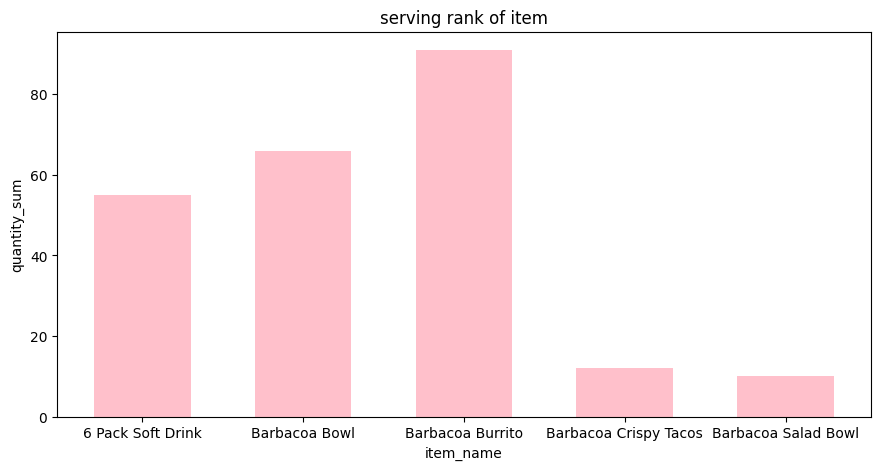

In [9]:
# 막대그래프를 그려보세요!
x = df.groupby('item_name')['quantity'].sum().head().index
y = df.groupby('item_name')['quantity'].sum().head().values

import matplotlib.pyplot as plt


plt.figure(figsize=(10.5,5))
plt.title('serving rank of item')
plt.xlabel('item_name')
plt.ylabel('quantity_sum')
plt.bar(x,y,
    color='pink',
    width=0.6)

In [10]:
# 각 아이템의 가격을 구하시오
## 주문이 1개이면서 
qu_df = df[df['quantity'] == 1]
## 같은 item_name 중에서 최저가격 찾기
groupby_df = qu_df.groupby('item_name').min()
## item_name들 중 가격이 높은 순으로 정렬
groupby_df.sort_values('item_price',ascending=False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",$8.99
Steak Salad,1406,1,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$8.69
Veggie Salad,1094,1,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",$8.49
Veggie Crispy Tacos,668,1,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice...",$8.49
Salad,575,1,"[Brown Rice, Adobo-Marinated and Grilled Chick...",$7.40
Crispy Tacos,217,1,[Adobo-Marinated and Grilled Chicken],$7.40
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",$7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",$7.40
6 Pack Soft Drink,1076,1,[Coke],$6.49


In [11]:
## 금액이 가장 높게 나온 주문번호에서 item이 총 몇개 주문되었는지 출력하시오
order_id_df = df.groupby('order_id').sum()   # -> order_id의 모든 주문 합계서
order_id_df.sort_values('item_price',ascending=False)   #  -> 주문 합계가 가장 큰 순으로 정렬

top1 = order_id_df['item_price'].idxmax()  # order_id가 926번이 총 주문금액수 1위

# item 당 주문한 개수
df[df['order_id']==top1].groupby('item_name')['quantity'].count()
# df[df['order_id']==top1].groupby('item_name')['quantity'].sum()

item_name
Barbacoa Crispy Tacos    1
Carnitas Salad Bowl      1
Name: quantity, dtype: int64

In [12]:
## Chicken Bowl를 2개 이상, 주문한 횟수가 몇번인지 출력하시오
item_chicken_bowl = df[df['item_name'] == 'Chicken Bowl']
item_chicken_bowl[item_chicken_bowl['quantity'] >= 2]

# Chicken bowl의 총 매출액을 출력
item_chicken_bowl['item_price'].sum()

# 총 매출액 대비 Chicken bowl의 매출액 비율
all_total = df['item_price'].sum()
chick_total = item_chicken_bowl['item_price'].sum()

chick_percent = round((chick_total/all_total)*100,2).astype(str)+'%'
print('총 매출액 대비 "Chicken Bowl"의 매출액 비율 : ',chick_percent)

TypeError: unsupported operand type(s) for /: 'str' and 'str'